## Handling missing values


In [73]:
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [74]:
## check missing values in dataset
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

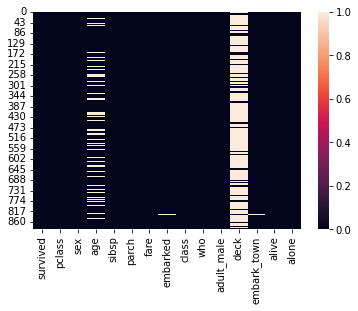

In [75]:
sns.heatmap(df.isnull())

In [76]:
## HAndling missing values by deleting rows

In [77]:
## rowwise deletion
df.dropna().shape ## shape basically gives the size of dataset

(182, 15)

In [78]:
df.shape

(891, 15)

In [79]:
## Handling missing values by deleting columns
df.dropna(axis=1) ## axis=1 is column and axis=0 is always row 


,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


#Imputation Technqiues
1.Mean Value Imputation<br>
2.Median Value Imputation<br>
3.Mode Value Imputations-Categorical<br>

<ipython-input-80-d27f76511770>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

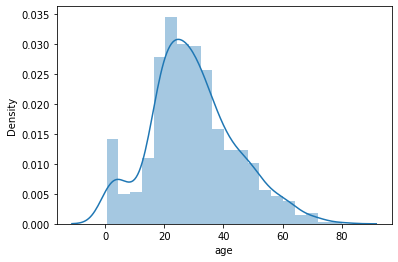

In [80]:
## Mean Value Imputations
sns.distplot(df['age'])

In [81]:
df.age.isnull().sum()

177

In [82]:
df['age_mean']=df['age'].fillna(df['age'].mean())
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [83]:
## This tecnqiue work well when your data is normally distributed

##2- Median Value Imputation
If you have ooutliers in dataset use thi technique

In [84]:
df['age_median']=df['age'].fillna(df['age'].median())
df[['age_median','age_mean','age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


##3.Mode-Value Imputations

In [85]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [86]:
df['embarked'].unique() ##for finding the unique catogories in specifieid row

array(['S', 'C', 'Q', nan], dtype=object)

In [87]:
df['embarked'].mode()[0] ## [0] is for from  0th index

'S'

In [88]:
from pandas.core.algorithms import mode
df['embarked_mode']=df['embarked'].fillna(mode)

In [89]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [90]:
##checking null values replaced or not...by mode
x1=df['embarked'].isnull().sum()
x2=df['embarked_mode'].isnull().sum()
x1,x2

(2, 0)

##Imbalanced Dataset Handling
Upsampling <br>
Down Sampling

In [91]:
import numpy as np
import pandas as pd
# Set the random seed for reproducibility
np.random.seed(123)
## create a dataframe with two classes
n_samples = 1000
class_0_ratio=0.9
n_class_0 = int(n_samples * class_0_ratio) 
n_class_1 = n_samples - n_class_0 

In [92]:
n_class_0,n_class_1

(900, 100)

In [93]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0), ##random.normal() method to get a Normal Data Distribution.
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0), ## loc-mean,scale-standard deviation, size- size of that column data
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [94]:
df=pd.concat([class_0,class_1]).reset_index(drop=True) ## concating and making data frame by pandas

In [95]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [96]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

###Upsampling

In [97]:
## sepreting majority and minority from target column
df_minority=df[df['target']==1] 
df_majority=df[df['target']==0]

In [98]:
df_minority.head()

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1


In [99]:
df_majority.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [100]:
##Upsampling perform
from sklearn.utils import resample ## from sklearn resample library can help us to resample

In [101]:
df_minority_upsample=resample(df_minority, 
                             replace=True, ## Sample With replacement
                              n_samples=len(df_majority), # to match the majority class)
                              random_state=42
                             )

In [102]:
df_minority_upsample.shape

(900, 3)

In [103]:
df_minority_upsample['target'].value_counts()

1    900
Name: target, dtype: int64

In [104]:
df_upsampled= pd.concat([df_majority,df_minority_upsample])

In [105]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

In [106]:
df_upsampled.shape

(1800, 3)

In [107]:
##Down-sampling
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [108]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)


In [109]:
df_minority=df[df['target']==1]     ##seperating both for down sampling the majority
df_majority=df[df['target']==0]

In [110]:
df_majority_downsample=resample(df_majority,
                             replace=False, ## Sample Without replacement
                              n_samples=len(df_minority), # to match the minority class)
                              random_state=42
                             )

In [111]:
df_downsample=pd.concat([df_minority,df_majority_downsample])

In [112]:
df_downsample['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

#SMOTE

In [113]:
## SMOTE
##Imp for Ml (all types of algorithm) (dataset library)
from sklearn.datasets import make_classification

In [114]:
## x is independent feature
## y is dependent feature
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90])

In [115]:
import pandas as pd
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [116]:
final_df.head()

,f1,f2,target
0,3.705538,2.488512,0
1,-0.152287,0.297663,0
2,1.659557,1.912021,0
3,1.154270,1.120570,0
4,2.094216,-2.881873,1


In [117]:
final_df['target'].value_counts()

0    898
1    102
Name: target, dtype: int64

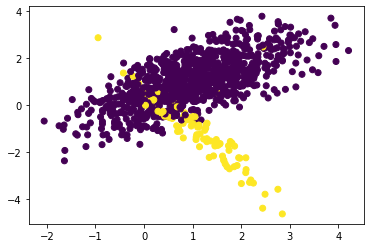

In [118]:
import matplotlib.pyplot as plt
plt.scatter(data=final_df,x='f1',y='f2',c='target')

In [119]:
!pip install imblearn ##smote library(imbalanced learn)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
from imblearn.over_sampling import SMOTE  ##importing smote

In [121]:
##transform the dataset
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [122]:
x.shape

(1796, 2)

In [123]:
len(y[y==1])

898

In [124]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

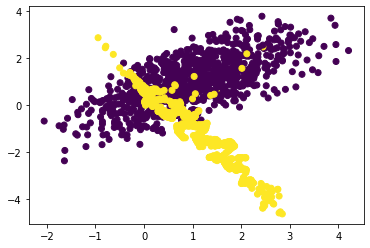

In [125]:
plt.scatter(data=oversample_df,x='f1',y='f2',c=oversample_df['target'])

# Interpolation 
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas. Here is an example of how to perform data interpolation using the NumPy library:<br><br>
**1. Linear Interpolation**

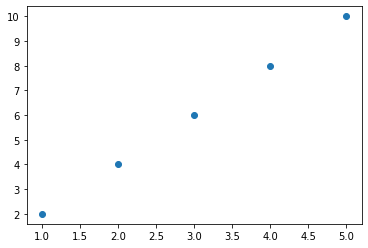

In [126]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [127]:
## interpolate the data using linear interpolation
x_new=np.linspace(1,5,10) ##create new x values
y_interp=np.interp(x_new,x,y) ## interpolate y values
print(y_interp)

[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]


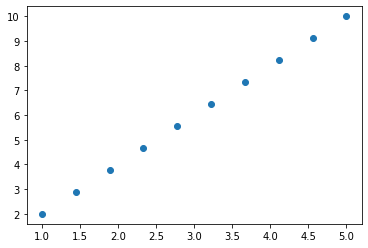

In [128]:
plt.scatter(x_new,y_interp)

**2.Cubic Interpolation With Scipy**

In [129]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])
from scipy.interpolate import interp1d 
##create a cubic interpolation function
f=interp1d(x,y,kind='cubic')
# interpolate the data
x_new = np.linspace(1, 5, 10)
y_interp=f(x_new)
print(y_interp)

[  1.           3.01371742   6.739369    12.7037037   21.43347051
  33.45541838  49.2962963   69.48285322  94.54183813 125.        ]


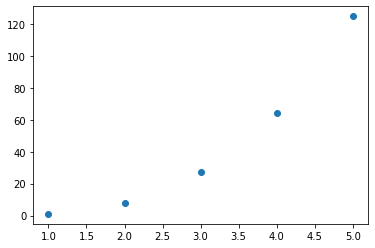

In [130]:
plt.scatter(x,y)

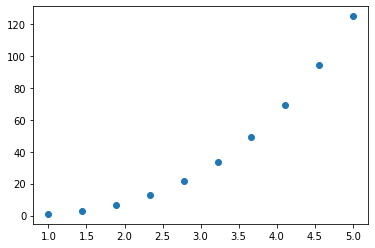

In [131]:
plt.scatter(x_new,y_interp)

**3.Polynomial Interpolation**

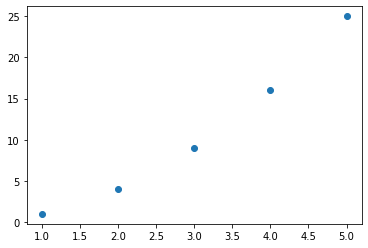

In [132]:
import numpy as np

# create some sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])
# interpolate the data using polynomial interpolation
p = np.polyfit(x, y, 2) # fit a 2nd degree polynomial to the data
x_new = np.linspace(1, 5, 10) # create new x values
y_interp = np.polyval(p, x_new) # interpolate y values
plt.scatter(x,y)

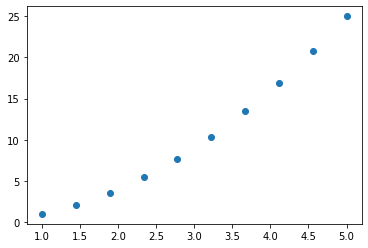

In [133]:
plt.scatter(x_new,y_interp)

## Handling Outliers
#### 5 number Summary
1. Minimum Value
2. Q1- 25 percentile
3. Median
4. Q3- 75 percentile
5. MAximum

In [134]:
import numpy as np
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,1000,1100]
## [Lower Fence<---> Higher Fence]
Q1=np.percentile(lst_marks,[25])
print(Q1)

[54.]


In [135]:
minimum,Q1,Q2,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [136]:
maximum

1100.0

In [137]:
IQR=Q3-Q1  ###IQR is basically inter-quantile range(Q3-Q1)
print(IQR)

35.5


In [138]:
lower_fence=Q1-1.5*(IQR)  ##lower and upper fence formula if any num is not in bitween then it is outlier
higher_fence=Q3+1.5*(IQR)
lower_fence,higher_fence

(0.75, 142.75)

In [139]:
outliers=[]             
for i in lst_marks:             ## loop for extracting outliers in a list
    if i>=0.75 and i<=142.75:
        print("This element is not an outlier")
    else:
        outliers.append(i)

This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier


In [140]:
outliers

[1000, 1100]

<Axes: >

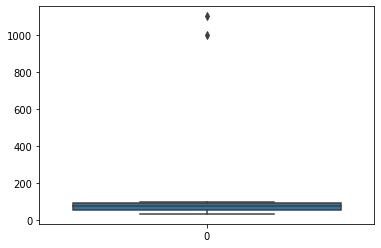

In [141]:
import seaborn as sns ##in this fig we plot a box plot there is two outliers in the top
sns.boxplot(lst_marks)

<Axes: >

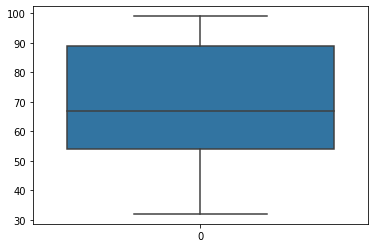

In [142]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74] 
sns.boxplot(lst_marks)            ##in this dataset there is no outliers 